<a href="https://colab.research.google.com/github/orhanaydinn/sign_language_Project/blob/main/Sign_Language_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Uploaded Dataset**

In [1]:
!pip install -q gdown
import gdown

file_id = "1ls3KScpK6p4siMTtGAuNx6MqsN4wYv7y"
url = f"https://drive.google.com/uc?id={file_id}"
output = "SL_Numbers.zip"

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1ls3KScpK6p4siMTtGAuNx6MqsN4wYv7y
From (redirected): https://drive.google.com/uc?id=1ls3KScpK6p4siMTtGAuNx6MqsN4wYv7y&confirm=t&uuid=60010259-a451-40b2-9df6-c05444ee4491
To: /content/SL_Numbers.zip
100%|██████████| 1.59G/1.59G [00:15<00:00, 99.5MB/s]


'SL_Numbers.zip'

SL_Numbers.zip file upload with google drive link.
```
zip_path = "/content/SL_Numbers.zip
extract_path = "/content/SL_Numbers"
```
**zip_path** represents the file path of the uploaded ZIP file.

**extract_path** defines the destination directory where the contents of the ZIP file will be extracted.

In [2]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/SL_Numbers.zip"
extract_path = "/content/SL_Numbers_datasets"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


Dataset successfully extracted to: /content/SL_Numbers_datasets


## 1.1 - Check Check Main Dataset File

Check the loaded datasets before data preparation process.

In [3]:
for root, dirs, files in os.walk(extract_path):
    print(f"\n{root}")
    for d in dirs:
        print(f"├── {d}")
    for f in files[:5]:
        print(f"├── {f}")


/content/SL_Numbers_datasets
├── SL_Numbers_our
├── SL_Numbers_merged
├── SL_Numbers_merged_aug
├── SL_Numbers
├── best_model_cnn.pt
├── best_model_resnet50_finetuned.pt
├── best_model_resnet50.pt
├── best_model_vgg16.pt

/content/SL_Numbers_datasets/SL_Numbers_our
├── 5
├── 4
├── 8
├── 6
├── 3
├── 9
├── 7
├── 2
├── 1
├── 0

/content/SL_Numbers_datasets/SL_Numbers_our/5
├── IMG_6671.JPEG
├── IMG_5395.JPG
├── IMG_5710.JPG
├── IMG_4981.JPG
├── IMG_1153.JPG

/content/SL_Numbers_datasets/SL_Numbers_our/4
├── IMG_5238.JPG
├── IMG_7010.JPEG
├── IMG_5586.JPG
├── IMG_4688.JPG
├── IMG_1274.JPG

/content/SL_Numbers_datasets/SL_Numbers_our/8
├── IMG_6928.JPEG
├── IMG_4421.JPG
├── IMG_5580.JPG
├── IMG_5109.JPG
├── IMG_4474.JPG

/content/SL_Numbers_datasets/SL_Numbers_our/6
├── IMG_5621.JPG
├── IMG_4550.JPG
├── IMG_5934.JPG
├── IMG_5812.JPG
├── IMG_5272.JPG

/content/SL_Numbers_datasets/SL_Numbers_our/3
├── IMG_4909.JPG
├── IMG_4459.JPG
├── IMG_6610.jpg
├── IMG_5850.JPG
├── IMG_4899.JPG

/content/

## 1.2 - Check Images for All Classes

Check the loaded datasets image before data preparation process.

**` def show_random_images(dataset_dir, samples=3):`**
This function displays a random 3 sample images from each class.

**`img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`**
cv2 library create BGR images default setting. This code convert BGR to RGB.



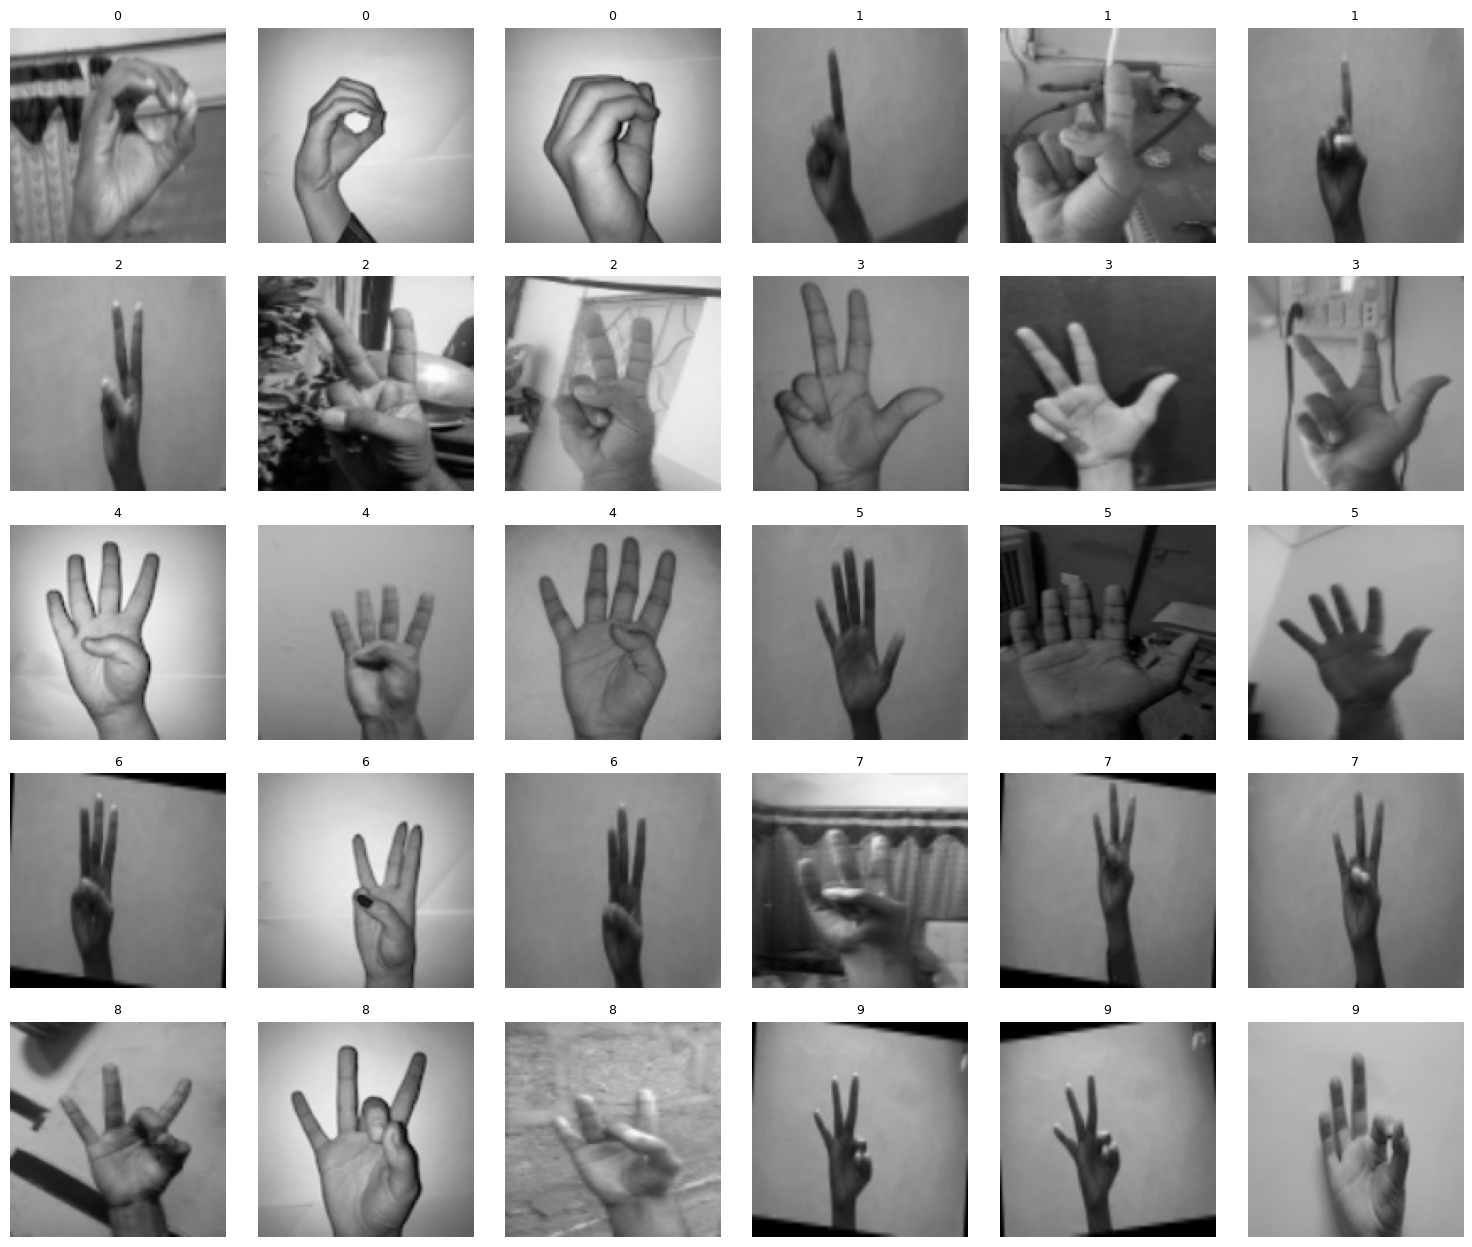

In [4]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers", samples=3)


## 1.3 - Check Main Dataset Count

The dataset size was controlled and created table and graph

   Class  Image Count
0   zero         1500
1    one         1500
2    two         1500
3  three         1500
4   four         1500
5   five         1500
6    six         1500
7  seven         1500
8  eight         1500
9   nine         1500

Total Image: 15000


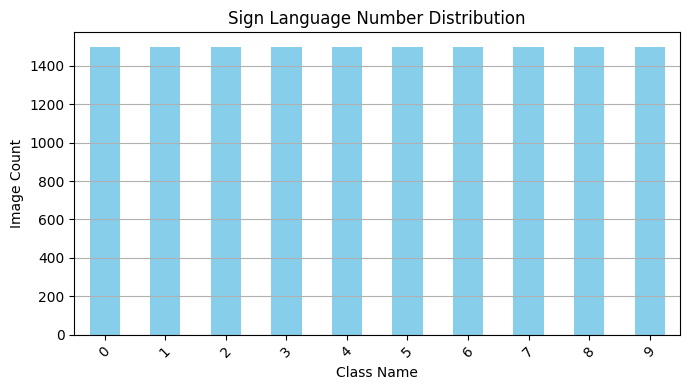

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

df.plot(kind="bar", figsize=(7, 4), legend=False, color="skyblue")
plt.title("Sign Language Number Distribution")
plt.ylabel("Image Count")
plt.xlabel("Class Name")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **2 - Sign Language Data Preparation & Preprocessing**

## 2.1 - Add Our Dataset

In this project, our models cannot detect images during some real-time detection with the original dataset, although the model training performance is good. Therefore, we decided to add our images for sign language number. This application improved our real-time detection performance.

We created a folder which name is **SL_Numbers_Our**. We took a photo nearly 10 times for our finger according to Sign language number with differents angles.

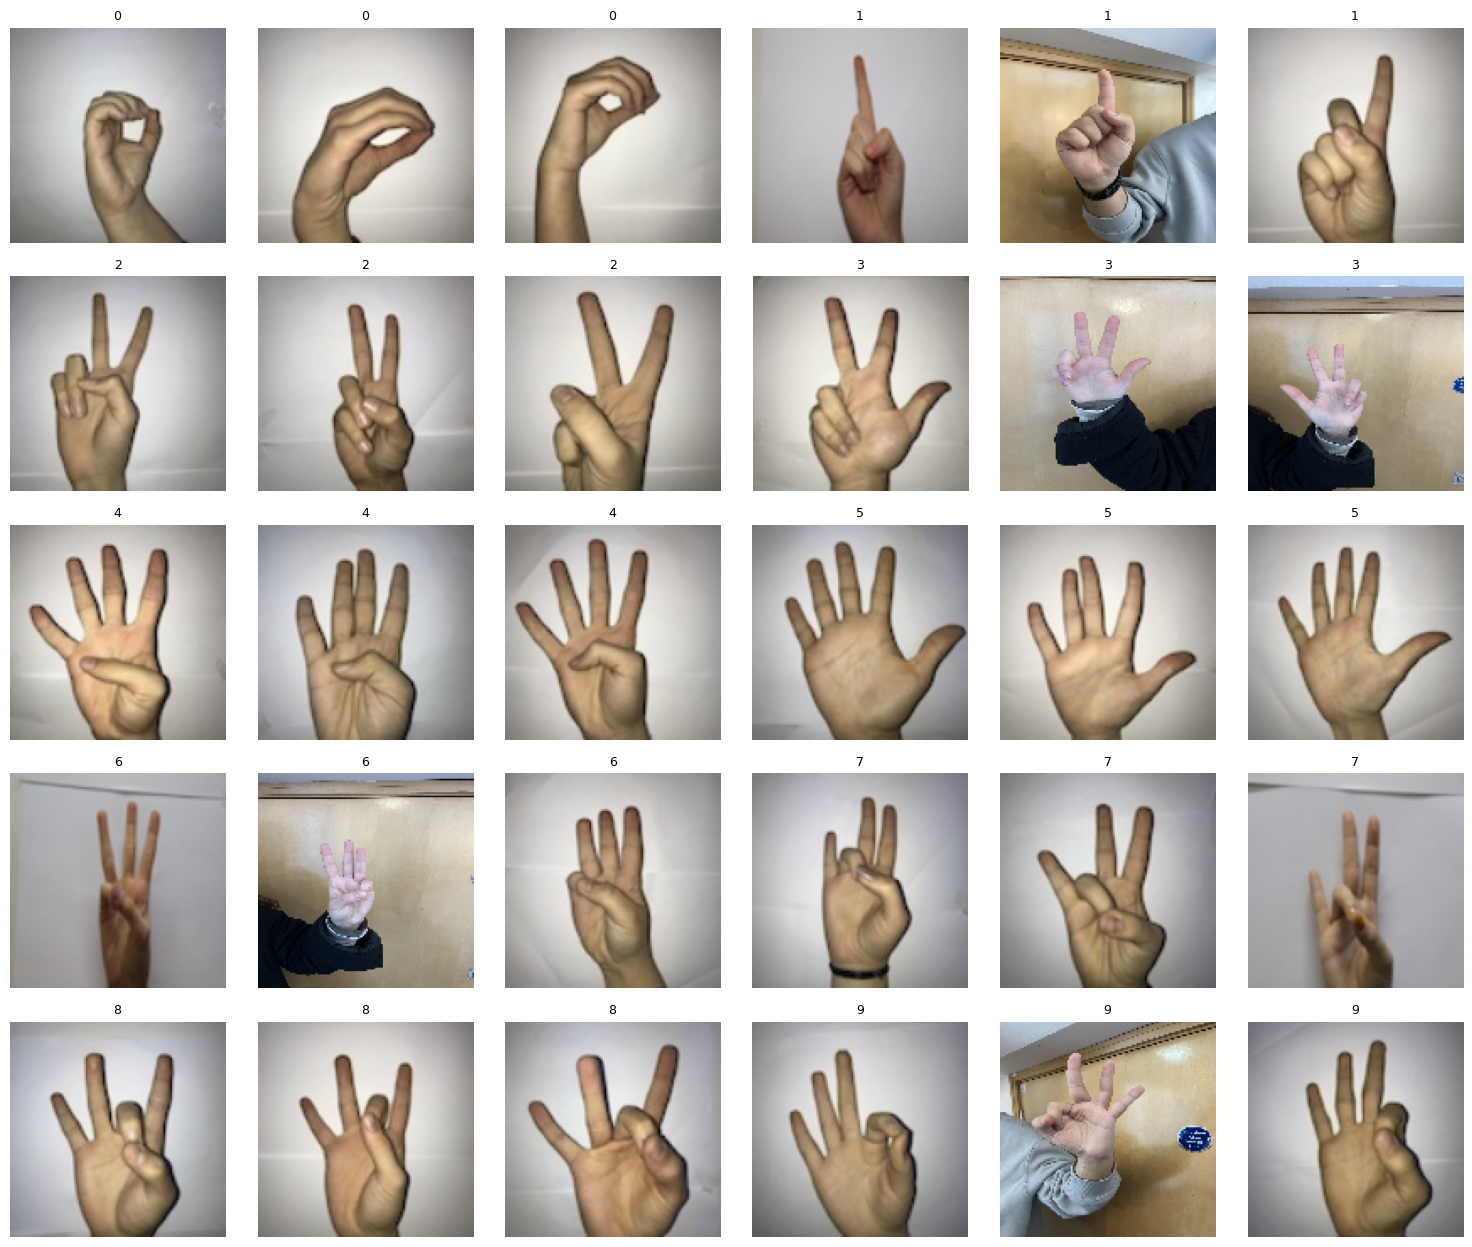

In [6]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers_our'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers_our", samples=3)


## 2.2 - Check Our Dataset Count

The dataset count was checked. Than ready for the merge with original dataset and our dataset.

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_our"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")



   Class  Image Count
0   zero          251
1    one          251
2    two          251
3  three          251
4   four          251
5   five          251
6    six          251
7  seven          251
9   nine          251
8  eight          248

Total Image: 2507


## 2.3 - Merge Main and Our Dataset

`original_dataset` The folder containing the original images.

`our_dataset_name` The folder containing the our images.

`merged_dataset` The folder where the merged and processed dataset will be output.

A new folder named **merged_dataset** was created. Thus, we did not interfere with the original dataset and our own dataset.


```
label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}
```

Class names are given numerically, such as `0, 1, 2, 3`. The photographs in the classes are named as `zero_1.jpg`, `four_8.jpg`. It is used to find the value corresponding to the class when naming the image.




`SL_Numbers_Our` Each class (tag) folder within it is examined.

```
for fname in os.listdir(target_folder):
    match = re.match(f"{label_name}_(\d+)", fname)
```
Existing files in the target folder are checked. The highest photo name is taken and the newly added photos continue after this index.


In [8]:
import os
import shutil
import cv2
import re

original_dataset = "/content/SL_Numbers_datasets/SL_Numbers"
our_dataset_name = "/content/SL_Numbers_datasets/SL_Numbers_our"
merged_dataset = "SL_Numbers_merged"
img_size = 64

label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

# Klasör temizleme/kopyalama
if os.path.exists(merged_dataset):
    shutil.rmtree(merged_dataset)
shutil.copytree(original_dataset, merged_dataset)
print("Original dataset copied to SL_Numbers_merged")

# Her sınıfı işle
for raw_label in os.listdir(our_dataset_name):
    if raw_label not in label_map:
        print(f"Unknown label: {raw_label}")
        continue

    label_name = label_map[raw_label]
    source_folder = os.path.join(our_dataset_name, raw_label)
    target_folder = os.path.join(merged_dataset, raw_label)

    if not os.path.exists(target_folder):
        print(f"Target folder does not exist: {target_folder}")
        continue


    max_index = 0
    for fname in os.listdir(target_folder):
        match = re.match(f"{label_name}_(\d+)", fname)
        if match:
            max_index = max(max_index, int(match.group(1)))

    added_count = 0
    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (img_size, img_size))

        new_index = max_index + 1
        new_filename = f"{label_name}_{new_index}.jpg"
        save_path = os.path.join(target_folder, new_filename)
        cv2.imwrite(save_path, resized)
        max_index = new_index
        added_count += 1

    print(f"Finished processing class: {raw_label} - {added_count} image(s) added ")


Original dataset copied to SL_Numbers_merged
Finished processing class: 5 - 251 image(s) added 
Finished processing class: 4 - 251 image(s) added 
Finished processing class: 8 - 248 image(s) added 
Finished processing class: 6 - 251 image(s) added 
Finished processing class: 3 - 251 image(s) added 
Finished processing class: 9 - 251 image(s) added 
Finished processing class: 7 - 251 image(s) added 
Finished processing class: 2 - 251 image(s) added 
Finished processing class: 1 - 251 image(s) added 
Finished processing class: 0 - 251 image(s) added 


## 2.4 - Check Current**(SL_Numbers_merged)** Dataset

The new dataset count was checked

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_merged"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

   Class  Image Count
0   zero         1751
1    one         1751
2    two         1751
3  three         1751
4   four         1751
5   five         1751
6    six         1751
7  seven         1751
9   nine         1751
8  eight         1748

Total Image: 17507


## 2.5 - Data Augmentation

By creating a new dataset named SL_Numbers_merged, the real-time detection performance of our model increased. However, some different angles were decreasing the prediction performance and causing errors when making real-time prediction.

In this section, new images were generated from different angles using the merged dataset.

`target_dir = "/content/SL_Numbers_merged_aug"` New Dataset Folder Name and Path

`def rotate(img, angle):` Rotates the image.

```
for i in range(1, 6):  # 5, 10, ..., 25 angles
    angle = i * 5
    rotated = rotate(img, angle)
    save_name = f"{base_name}_L_{i}.jpg"
```
Five new photographs, each rotated five degrees to the left, were generated.

`save_name = f"{base_name}_L_{i}.jpg"` new generated images was saved.

`one_1_L_1.jpg`  (one_1.jpg was rotated **5** degrees left)

`one_1_L_2.jpg  `(one_1.jpg was rotated **10** degrees left)

...

`one_1_R_5.jpg`  (one_1.jpg was rotated **25** degrees left)


```
for i in range(1, 6):  # 5, 10, ..., 25 angles
    angle = -i * 5
    rotated = rotate(img, angle)
    save_name = f"{base_name}_R_{i}.jpg"
```
Five new photographs, each rotated five degrees to the right, were generated.

```
    save_name = f"{base_name}_r_{i}.jpg"
```
Five new photographs, each rotated five degrees to the left, were generated.

`save_name = f"{base_name}_r_{i}.jpg"` new generated images was saved.

`one_1_L_1.jpg`  (one_1.jpg was rotated **5** degrees right)

`one_1_L_2.jpg  `(one_1.jpg was rotated **10** degrees right)

In [10]:
import os
import cv2

source_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged"
target_dir = "/content/SL_Numbers_merged_aug"
img_size = 64

# Label → filename prefix map
label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def rotate(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)

total_augmented = 0


for label in os.listdir(source_dir):
    src_folder = os.path.join(source_dir, label)
    dst_folder = os.path.join(target_dir, label)
    os.makedirs(dst_folder, exist_ok=True)

    label_prefix = label_map.get(label, label)

    class_augmented = 0

    for fname in os.listdir(src_folder):
        if not fname.lower().endswith(".jpg"):
            continue

        fpath = os.path.join(src_folder, fname)
        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to read: {fname}")
            continue

        base_name = fname.split(".")[0]

        for i in range(1, 6):  # For Left
            angle = i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_L_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

        for i in range(1, 6):  # For Right
            angle = -i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_R_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

    print(f" Finished processing class: {label} - {class_augmented} image added")

print(f"\nTotal Image: {total_augmented}")


 Finished processing class: 5 - 17510 image added
 Finished processing class: 4 - 17510 image added
 Finished processing class: 8 - 17480 image added
 Finished processing class: 6 - 17510 image added
 Finished processing class: 3 - 17510 image added
 Finished processing class: 9 - 17510 image added
 Finished processing class: 7 - 17510 image added
 Finished processing class: 2 - 17510 image added
 Finished processing class: 1 - 17510 image added
 Finished processing class: 0 - 17510 image added

Total Image: 175070


## 2.6 - Check Data Augmentation Image

New merged and augmentation dataset was controlled with first 10 images.

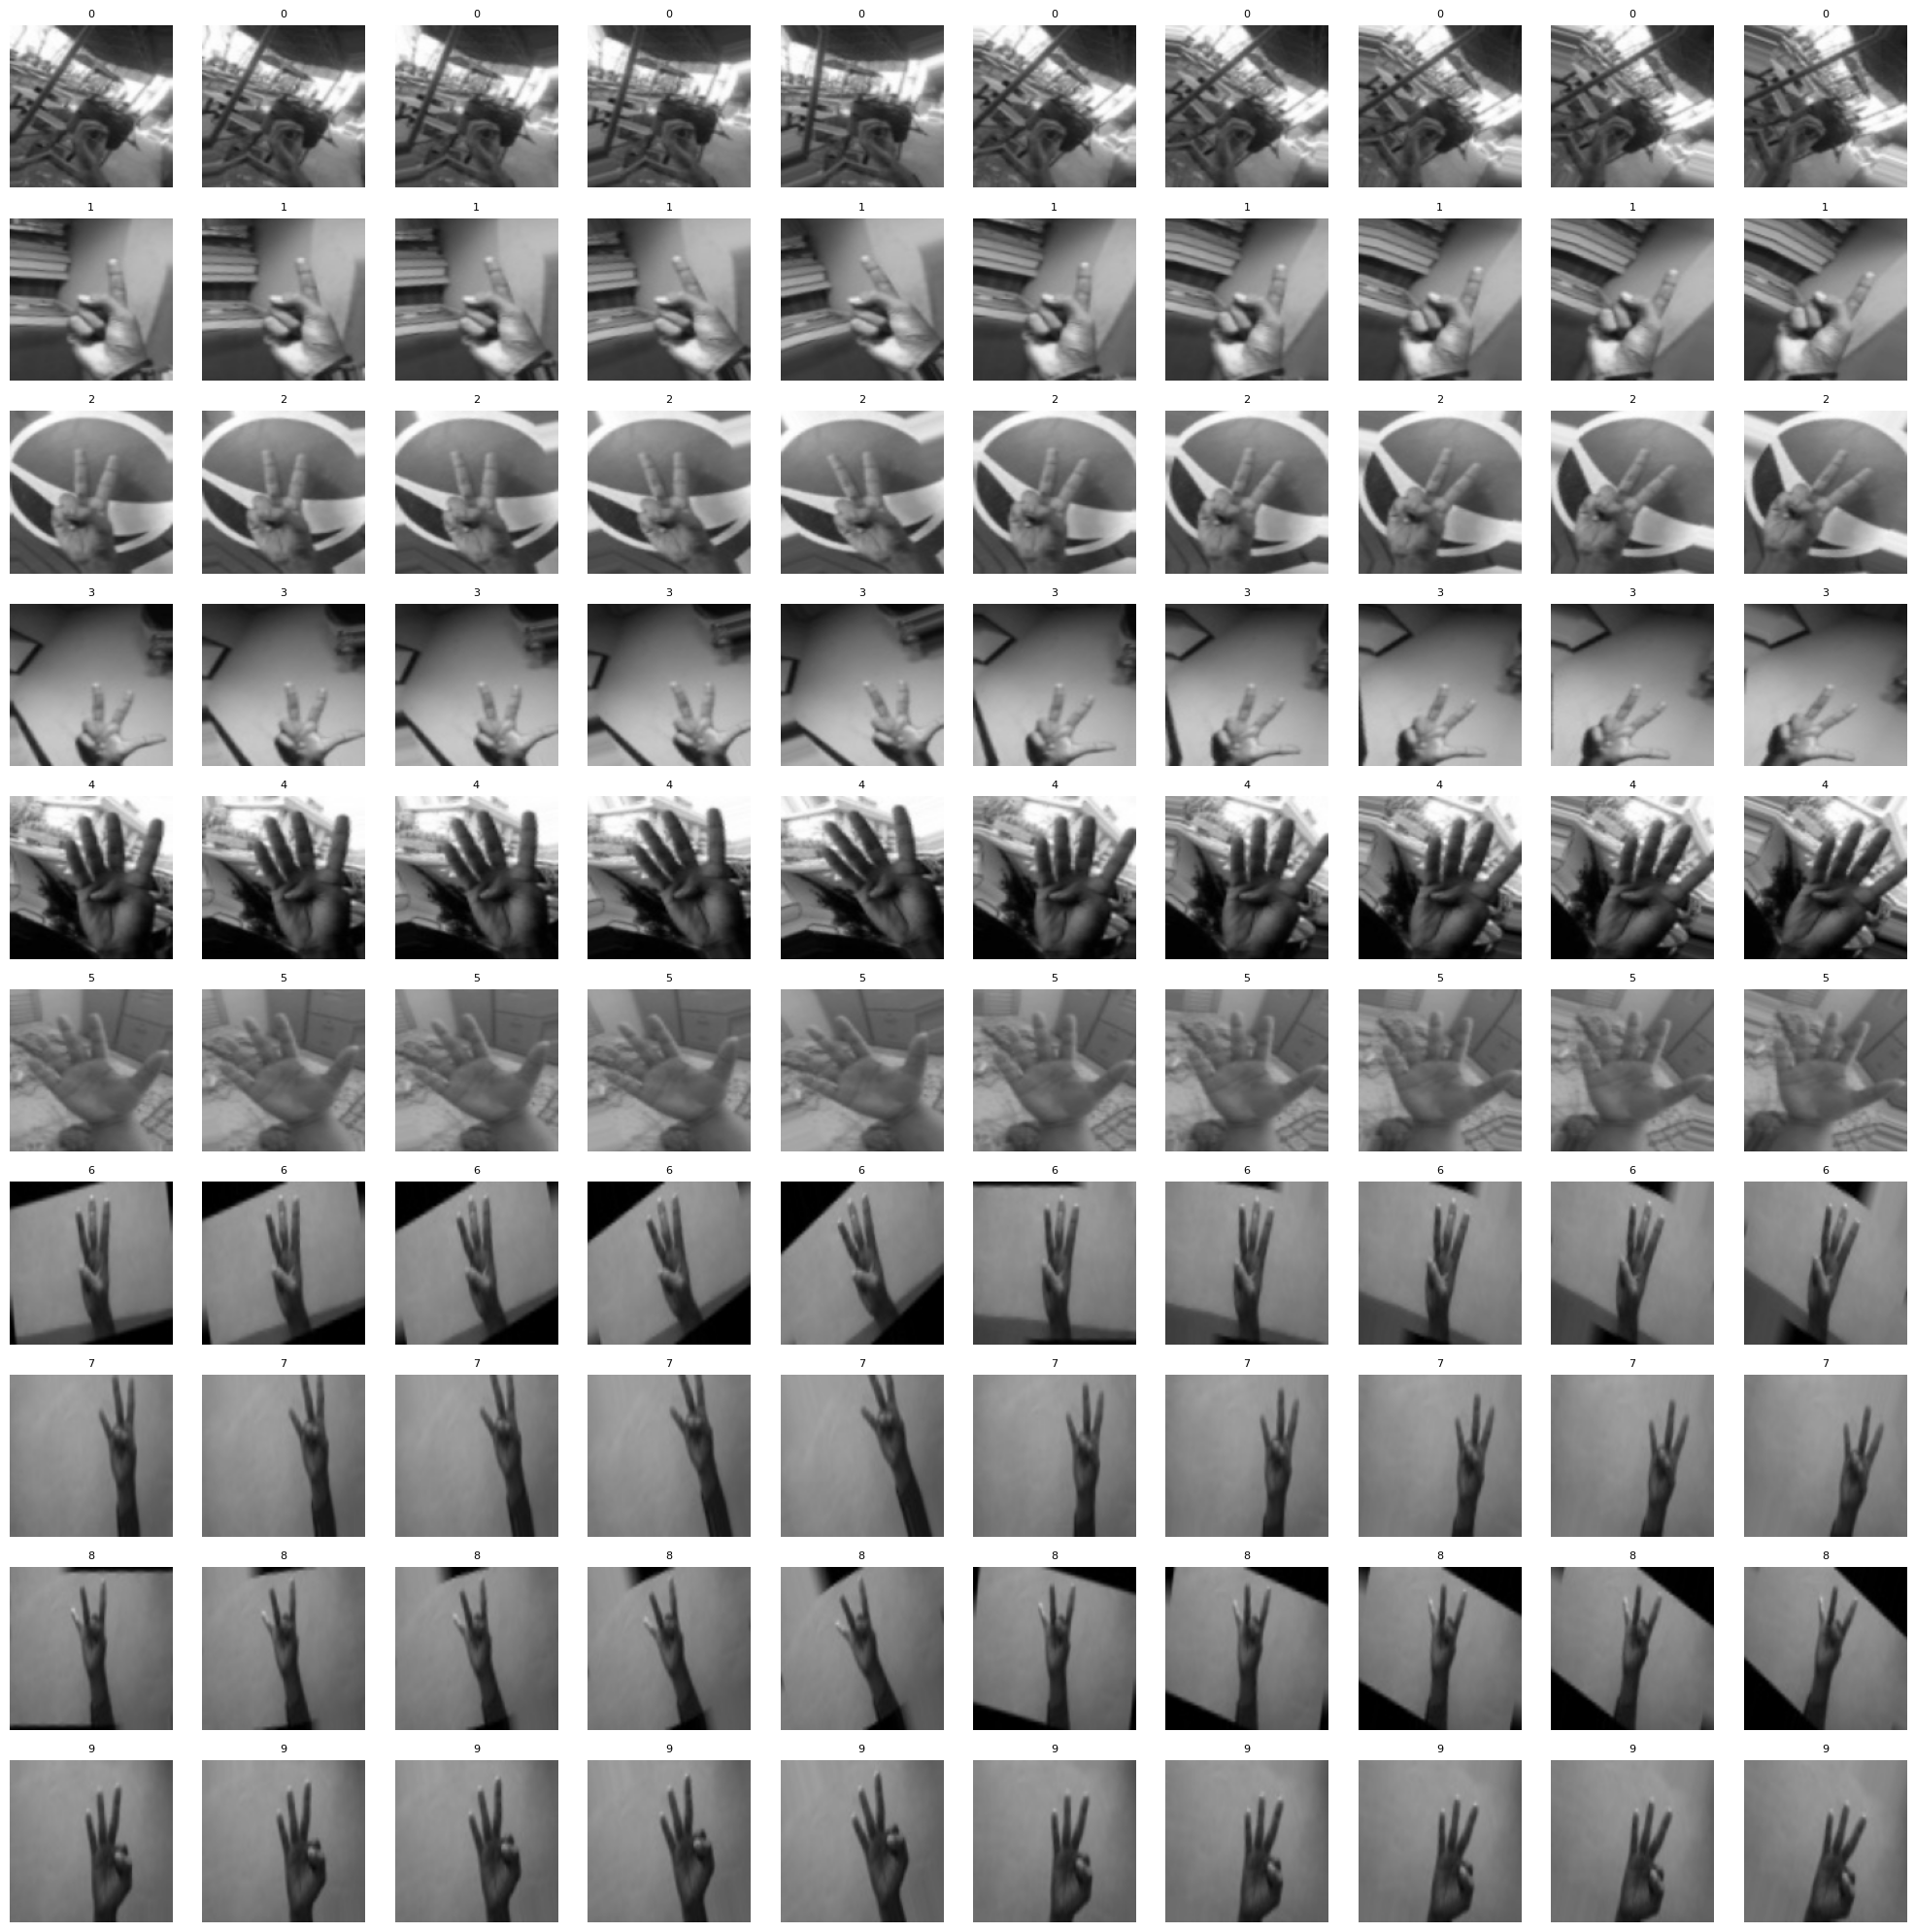

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_first_images(dataset_dir, samples=10):
    class_folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

    rows = len(class_folders)
    cols = samples
    plt.figure(figsize=(cols * 2, rows * 2))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(dataset_dir, label)
        images = sorted(os.listdir(class_path))[:samples]

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=8)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_first_images("/content/SL_Numbers_datasets/SL_Numbers_merged_aug", samples=10)

## 2.7 - Image Path and Label List

In [12]:
import os
import random

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged_aug"
image_label_list = []

# Her sınıftan bir örnek için dictionary
sample_per_class = {}

for label in sorted(os.listdir(base_dir)):
    class_dir = os.path.join(base_dir, label)
    if not os.path.isdir(class_dir):
        continue
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        image_label_list.append((img_path, int(label)))  # label: 0-9


    if images:
        random_img = random.choice(images)
        random_img_path = os.path.join(class_dir, random_img)
        sample_per_class[label] = random_img_path


print(f"Total Image: {len(image_label_list)}")

for label, img_path in sample_per_class.items():
    print(f"Class {label}: {img_path}")

Total Image: 175070
Class 0: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/0/zero_337_R_2.jpg
Class 1: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/1/one_505_L_3.jpg
Class 2: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/2/two_1530_R_5.jpg
Class 3: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/3/three_894_L_4.jpg
Class 4: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/4/four_1626_L_3.jpg
Class 5: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/5/five_164_R_4.jpg
Class 6: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/6/six_369_L_5.jpg
Class 7: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/7/seven_1397_L_5.jpg
Class 8: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/8/eight_617_L_4.jpg
Class 9: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/9/nine_402_L_3.jpg


# **3 - Model Training & Evaluation**

## 3.1 - Train / Validation Split & DataLoader Preparation

In [13]:
from torch.utils.data import Dataset
from PIL import Image

class SignLanguageDataset(Dataset):
    def __init__(self, image_label_list, transform=None):
        self.data = image_label_list  # Liste: (path, label)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")  # Grayscale (tek kanal)

        if self.transform:
            image = self.transform(image)

        return image, label

In [14]:
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader

train_list, val_list = train_test_split(
    image_label_list,
    test_size=0.2,
    stratify=[label for _, label in image_label_list],
    random_state=42
)

In [15]:
print(f"Train set: {len(train_list)} images")
print(f"Validation set: {len(val_list)} images")


Train set: 140056 images
Validation set: 35014 images


In [16]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [17]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [18]:
train_dataset = SignLanguageDataset(train_list, transform=train_transforms)
val_dataset   = SignLanguageDataset(val_list, transform=val_transforms)

In [19]:
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=8)
val_loader   = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=8)

## 3.2 -CNN - Model Architecture

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 → 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv3(x)))  # 16x16 → 8x8
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cnn = SignLanguageCNN(num_classes=10).to(device)
print(model_cnn)

SignLanguageCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


### 3.2.1 - CNN Model Training

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_cnn.pt"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_cnn.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_cnn(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1  # epoch 1'den başlıyorsa
        early_stop_counter = 0
        torch.save(model_cnn.state_dict(), save_path)
        print(f"Best model was saved at epoch: {best_epoch}")
    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 262.21s
  Train Loss: 0.5754 | Acc: 80.77%
  Val   Loss: 0.1556 | Acc: 95.08%
Best model was saved at epoch: 1
Epoch 2/30 | 262.12s
  Train Loss: 0.0851 | Acc: 97.23%
  Val   Loss: 0.0889 | Acc: 97.15%
Best model was saved at epoch: 2
Epoch 3/30 | 262.87s
  Train Loss: 0.0360 | Acc: 98.82%
  Val   Loss: 0.0763 | Acc: 97.64%
Best model was saved at epoch: 3
Epoch 4/30 | 263.35s
  Train Loss: 0.0236 | Acc: 99.22%
  Val   Loss: 0.0866 | Acc: 97.31%
val_accuracy did not improve (1/5)
Epoch 5/30 | 262.85s
  Train Loss: 0.0191 | Acc: 99.40%
  Val   Loss: 0.0672 | Acc: 98.14%
Best model was saved at epoch: 5
Epoch 6/30 | 262.64s
  Train Loss: 0.0159 | Acc: 99.49%
  Val   Loss: 0.0606 | Acc: 98.15%
Best model was saved at epoch: 6
Epoch 7/30 | 263.04s
  Train Loss: 0.0147 | Acc: 99.53%
  Val   Loss: 0.0676 | Acc: 98.00%
val_accuracy did not improve (1/5)
Epoch 8/30 | 262.38s
  Train Loss: 0.0130 | Acc: 99.60%
  Val   Loss: 0.0625 | Acc: 98.32%
val_accuracy did not improve (2/5)
Ep

### 3.2.2 - CNN Model Training Visualization

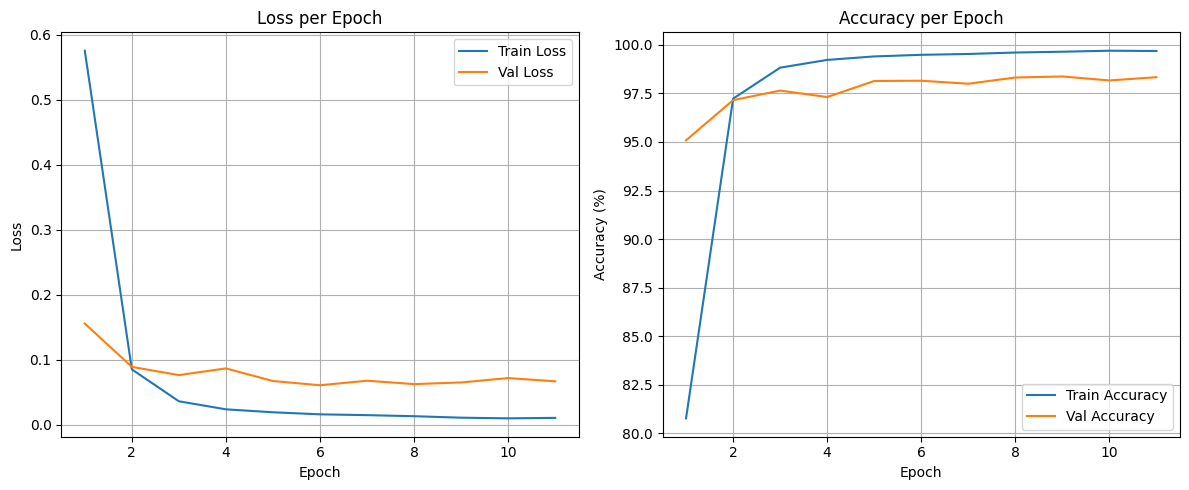

In [33]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

# Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.plot(epochs_range, val_accuracies, label="Val Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2.3 - Confusion Matrix & Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch


model_cnn.load_state_dict(torch.load("/content/SL_Numbers_datasets/best_model_cnn.pt"))
model_cnn.eval()


all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model_cnn(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
labels = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

RuntimeError: Error(s) in loading state_dict for SignLanguageCNN:
	size mismatch for conv1.weight: copying a param with shape torch.Size([32, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([32, 3, 3, 3]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([256, 8192]) from checkpoint, the shape in current model is torch.Size([256, 100352]).

## 3.3 - VGG16 Transfer Learning Model Architectire

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()

        self.base_model = models.vgg16(pretrained=True)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_vgg = VGG16SignLanguage(num_classes=10, freeze=True).to(device)


print(model_vgg)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG16SignLanguage(
  (base_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=Tru

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

### 3.3.1 - VGG16 Model Training

In [ ]:
import time
import numpy as np
import torch

num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_vgg16.pt"

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_vgg.parameters(), lr=0.0005)


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_vgg.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_vgg(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)


    model_vgg.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_vgg(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    # --- Epoch özeti ---
    epoch_time = time.time() - epoch_start
    print(f"Epoch {epoch+1}/{num_epochs} | ⏱️ {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Acc: {train_acc:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Acc: {val_acc:.2f}%")

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stop_counter = 0
        torch.save(model_vgg.state_dict(), save_path)
        print("Best model was saved:",)
    else:
        early_stop_counter += 1
        print(f"val_loss did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | ⏱️ 112.56s
  Train Loss: 0.4675 | Acc: 83.98%
  Val   Loss: 0.2131 | Acc: 92.62%
Best model was saved.
Epoch 2/30 | ⏱️ 112.31s
  Train Loss: 0.2363 | Acc: 92.18%
  Val   Loss: 0.1465 | Acc: 95.26%
Best model was saved.
Epoch 3/30 | ⏱️ 112.33s
  Train Loss: 0.1863 | Acc: 93.96%
  Val   Loss: 0.1142 | Acc: 96.12%
Best model was saved.
Epoch 4/30 | ⏱️ 112.27s
  Train Loss: 0.1579 | Acc: 95.02%
  Val   Loss: 0.1038 | Acc: 96.45%
Best model was saved.
Epoch 5/30 | ⏱️ 112.38s
  Train Loss: 0.1463 | Acc: 95.42%
  Val   Loss: 0.0804 | Acc: 97.35%
Best model was saved.
Epoch 6/30 | ⏱️ 112.35s
  Train Loss: 0.1341 | Acc: 95.99%
  Val   Loss: 0.0825 | Acc: 97.33%
val_loss did not improve (1/5)
Epoch 7/30 | ⏱️ 112.37s
  Train Loss: 0.1290 | Acc: 96.21%
  Val   Loss: 0.0757 | Acc: 97.63%
Best model was saved.
Epoch 8/30 | ⏱️ 112.33s
  Train Loss: 0.1283 | Acc: 96.37%
  Val   Loss: 0.0650 | Acc: 97.91%
Best model was saved.
Epoch 9/30 | ⏱️ 112.29s
  Train Loss: 0.1167 | Acc: 96.70%
  Va

### 3.3.2 - VGG16 Model Training Visualization

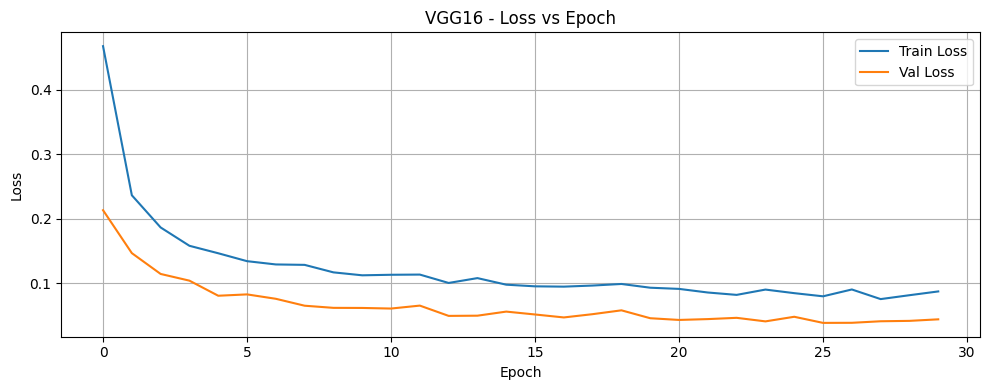

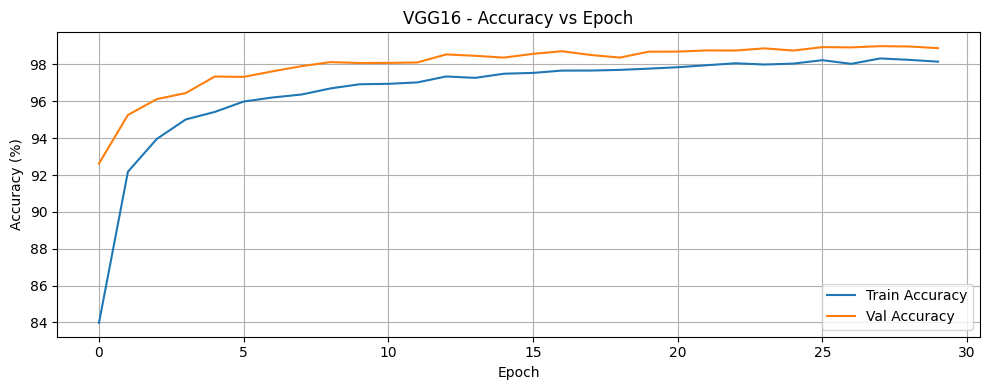

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("VGG16 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("VGG16 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.3.3 - Confusion Matrix & Model Evaluation

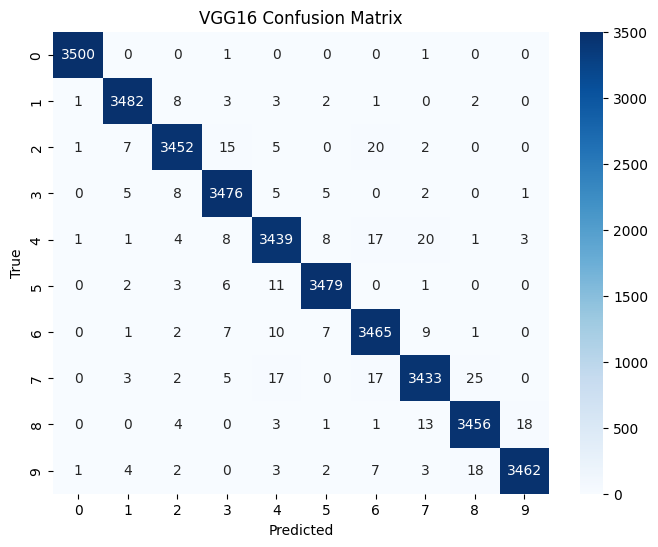

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model_vgg.load_state_dict(torch.load("best_model_vgg16.pt", map_location=device))
model_vgg.eval()


true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_vgg(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(preds.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
class_names = [str(i) for i in range(10)]  # 0–9

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("VGG16 Confusion Matrix")
plt.show()


## 3.4 - ResNet50 Transfer Learning Model Architecture

In [ ]:
import torch.nn as nn
from torchvision import models

class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)

In [ ]:
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)
print(model_resnet)

ResNet50SignLanguage(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequen

### 3.4.1 ResNet50 Model Training

In [ ]:
import time
import numpy as np

num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_resnet50.pt"

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.0005)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    model_resnet.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model_resnet.eval()
    val_loss, val_correct, val_total = 0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    epoch_time = time.time() - epoch_start
    print(f"Epoch {epoch+1}/{num_epochs} | ⏱️ {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Acc: {train_acc:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Acc: {val_acc:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save(model_resnet.state_dict(), save_path)
        print(" Best model saved")
    else:
        early_stop_counter += 1
        print(f"  val_loss did not improve ({early_stop_counter}/{patience})")
        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Best Model: {best_epoch}")
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")


Epoch 1/30 | ⏱️ 52.72s
  Train Loss: 0.7165 | Acc: 76.59%
  Val   Loss: 0.7939 | Acc: 74.20%
 Best model saved
Epoch 2/30 | ⏱️ 52.15s
  Train Loss: 0.7138 | Acc: 76.68%
  Val   Loss: 0.7970 | Acc: 74.26%
  val_loss did not improve (1/5)
Epoch 3/30 | ⏱️ 52.34s
  Train Loss: 0.7129 | Acc: 76.56%
  Val   Loss: 0.7963 | Acc: 74.22%
  val_loss did not improve (2/5)
Epoch 4/30 | ⏱️ 52.36s
  Train Loss: 0.7125 | Acc: 76.53%
  Val   Loss: 0.7913 | Acc: 74.56%
 Best model saved
Epoch 5/30 | ⏱️ 52.17s
  Train Loss: 0.7140 | Acc: 76.64%
  Val   Loss: 0.7939 | Acc: 74.36%
  val_loss did not improve (1/5)
Epoch 6/30 | ⏱️ 52.42s
  Train Loss: 0.7116 | Acc: 76.49%
  Val   Loss: 0.8087 | Acc: 74.05%
  val_loss did not improve (2/5)
Epoch 7/30 | ⏱️ 52.43s
  Train Loss: 0.7101 | Acc: 76.68%
  Val   Loss: 0.7975 | Acc: 74.52%
  val_loss did not improve (3/5)
Epoch 8/30 | ⏱️ 52.19s
  Train Loss: 0.7096 | Acc: 76.75%
  Val   Loss: 0.7821 | Acc: 74.99%
 Best model saved
Epoch 9/30 | ⏱️ 52.33s
  Train Loss: 

### 3.4.2 - ResNet50 Model Training Visualization

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("VGG16 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("VGG16 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.4.3 - ResNet50 -  Confusion Matrix & Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model_vgg.load_state_dict(torch.load("best_model_resnet50.pt", map_location=device))
model_vgg.eval()


true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_vgg(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(preds.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
class_names = [str(i) for i in range(10)]  # 0–9

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("ResNet50 Confusion Matrix")
plt.show()


### 3.4.4 - ResNet50 Fine Tuning

In [ ]:
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=False).to(device)


In [ ]:
import time
import numpy as np
import torch.nn as nn

num_epochs = 50
patience = 7
best_val_loss = np.inf
best_epoch = 0
early_stop_counter = 0
save_path = "best_model_resnet50_finetuned.pt"

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.0001)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    model_resnet.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # --- Validation ---
    model_resnet.eval()
    val_loss, val_correct, val_total = 0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    epoch_time = time.time() - epoch_start
    print(f"Epoch {epoch+1}/{num_epochs} | ⏱️ {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Acc: {train_acc:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Acc: {val_acc:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save(model_resnet.state_dict(), save_path)
        print("  Best model saved (checkpoint)")
    else:
        early_stop_counter += 1
        print(f"  val_loss did not improve ({early_stop_counter}/{patience})")
        if early_stop_counter >= patience:
            print("early stopping")
            break


total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Best Model: {best_epoch}")
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/50 | ⏱️ 161.02s
  Train Loss: 0.2125 | Acc: 93.35%
  Val   Loss: 0.0140 | Acc: 99.58%
  Best model saved (checkpoint)
Epoch 2/50 | ⏱️ 160.81s
  Train Loss: 0.0067 | Acc: 99.80%
  Val   Loss: 0.0055 | Acc: 99.81%
  Best model saved (checkpoint)
Epoch 3/50 | ⏱️ 160.81s
  Train Loss: 0.0042 | Acc: 99.88%
  Val   Loss: 0.0037 | Acc: 99.88%
  Best model saved (checkpoint)
Epoch 4/50 | ⏱️ 160.75s
  Train Loss: 0.0040 | Acc: 99.88%
  Val   Loss: 0.0034 | Acc: 99.90%
  Best model saved (checkpoint)
Epoch 5/50 | ⏱️ 160.69s
  Train Loss: 0.0040 | Acc: 99.87%
  Val   Loss: 0.0030 | Acc: 99.89%
  Best model saved (checkpoint)
Epoch 6/50 | ⏱️ 160.66s
  Train Loss: 0.0025 | Acc: 99.93%
  Val   Loss: 0.0061 | Acc: 99.82%
  val_loss did not improve (1/7)
Epoch 7/50 | ⏱️ 160.63s
  Train Loss: 0.0028 | Acc: 99.92%
  Val   Loss: 0.0019 | Acc: 99.94%
  Best model saved (checkpoint)
Epoch 8/50 | ⏱️ 160.65s
  Train Loss: 0.0022 | Acc: 99.94%
  Val   Loss: 0.0056 | Acc: 99.81%
  val_loss did not impr

### 3.4.5 - ResNet50 Fine Tuning Training Visualization

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("VGG16 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("VGG16 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'train_losses' is not defined

<Figure size 1000x400 with 0 Axes>

### 3.4.6 - ResNet50 Fine-Tuned -  Confusion Matrix & Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model_vgg.load_state_dict(torch.load("best_model_resnet50_finetuned.pt", map_location=device))
model_vgg.eval()


true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_vgg(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(preds.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
class_names = [str(i) for i in range(10)]  # 0–9

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("ResNet50 Confusion Matrix")
plt.show()


# **4 - Prediction**

In [35]:
import cv2
import numpy as np
import base64
from IPython.display import display, Javascript
from google.colab.output import eval_js
from PIL import Image as PilImage
from torchvision import transforms
import torch
from google.colab.patches import cv2_imshow


def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript("""
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    """)
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename


<IPython.core.display.Javascript object>

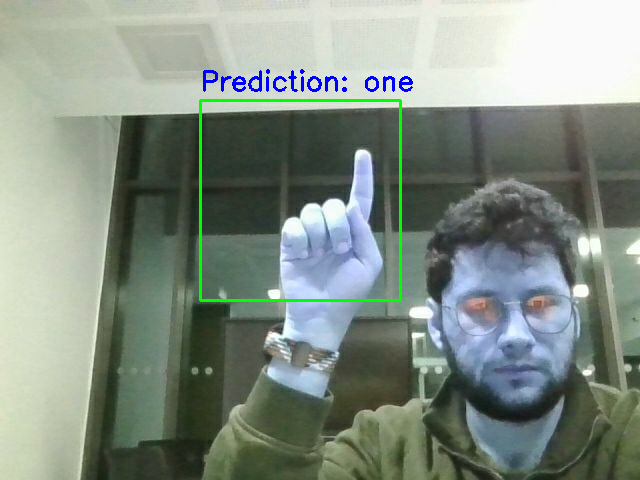

📌 Prediction: one

Press Enter for new prediction, Press q for exit: 


<IPython.core.display.Javascript object>

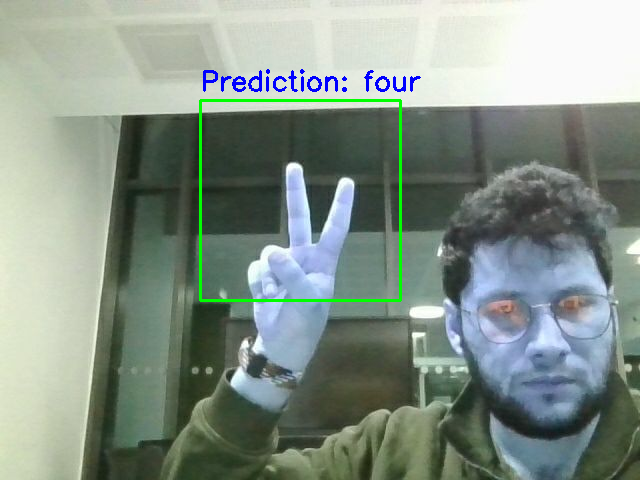

📌 Prediction: four

Press Enter for new prediction, Press q for exit: 


<IPython.core.display.Javascript object>

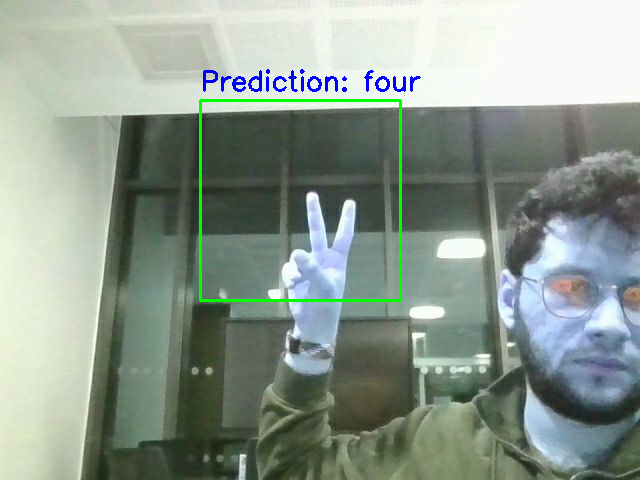

📌 Prediction: four

Press Enter for new prediction, Press q for exit: 


<IPython.core.display.Javascript object>

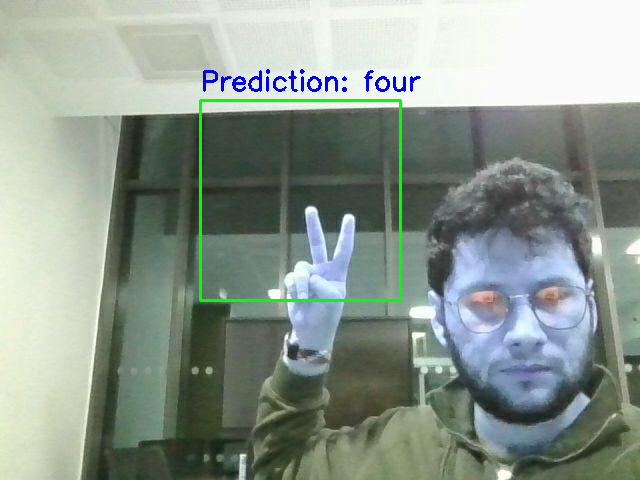

📌 Prediction: four

Press Enter for new prediction, Press q for exit: 


<IPython.core.display.Javascript object>

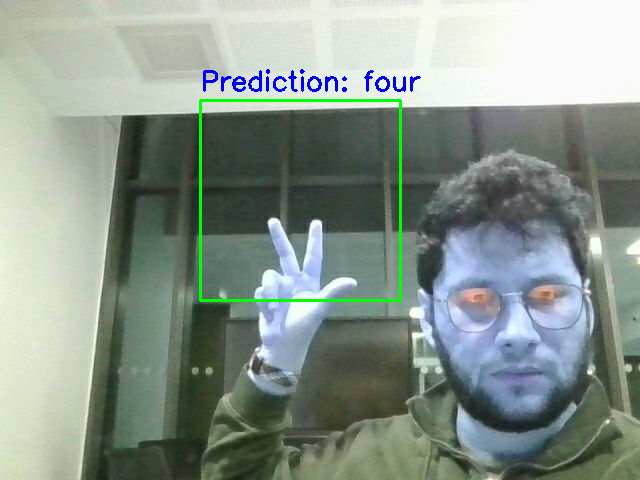

📌 Prediction: four

Press Enter for new prediction, Press q for exit: 


<IPython.core.display.Javascript object>

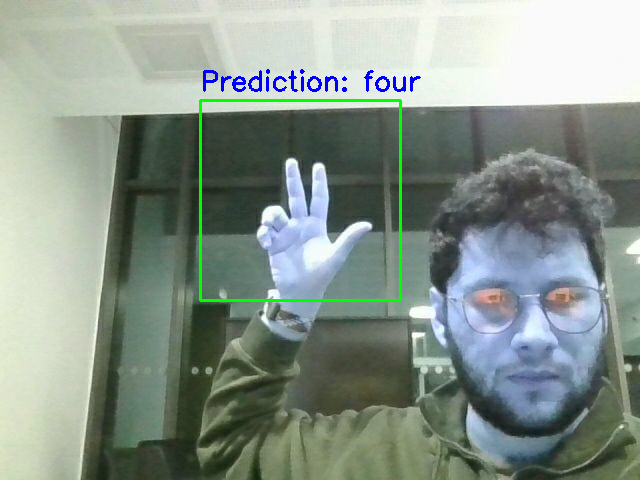

📌 Prediction: four

Press Enter for new prediction, Press q for exit: 


<IPython.core.display.Javascript object>

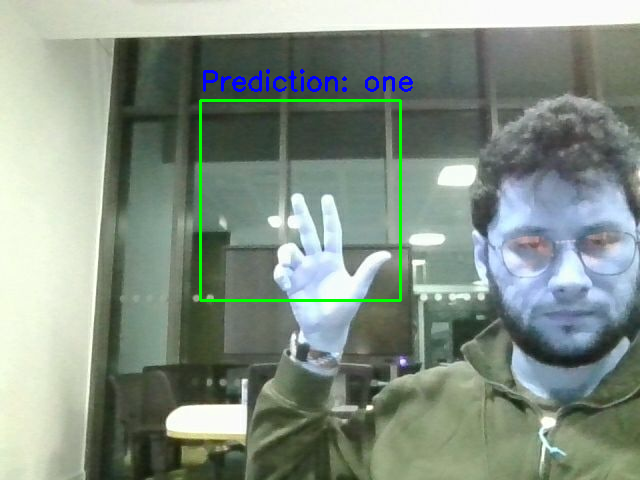

📌 Prediction: one


KeyboardInterrupt: Interrupted by user

In [45]:

label_map = {
    0: "zero", 1: "one", 2: "two", 3: "three", 4: "four",
    5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"
}


model_cnn.eval()

while True:
    image_path = take_photo()

    # 📂 Create Roi
    frame = cv2.imread(image_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 🟩 Roi Rectangle
    x, y, w, h = 200, 100, 200, 200
    roi = frame_rgb[y:y+h, x:x+w]

    # 🔄 Keep the image as RGB and resize
    resized = cv2.resize(roi, (224, 224))

    # 🔄 Normalize with mean and std used during training (if any)
    # You may need to adjust these values if different normalization was used during training
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    normalized = transform(resized)

    # 🔄 Create tensor
    tensor_img = normalized.unsqueeze(0).float().to(device)

    # Predoction
    with torch.no_grad():
        output = model_cnn(tensor_img)
        _, predicted = torch.max(output, 1)
        predicted_label = predicted.item()
        predicted_text = label_map[predicted_label]

    # Write prediction
    frame_display = frame_rgb.copy()
    cv2.rectangle(frame_display, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frame_display, f"Prediction: {predicted_text}", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Show
    cv2_imshow(frame_display)
    print(f"📌 Prediction: {predicted_text}")

    # Continue
    cont = input("\nPress Enter for new prediction, Press q for exit: ")
    if cont.strip().lower() == 'q':
        print("🚪 Tahmin döngüsünden çıkılıyor...")
        break
